In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

/Users/anuragmakineni/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
#### INPUTS ####

## MASS ##
boat_empty_mass = 15.0 # kg
payload_mass = np.linspace(2.0, 20.0, 5) # kg

## DIMENSIONS ##
boat_width = 0.5 # m
boat_length = 1.5 # m

## PERFORMANCE ##
velocity = np.linspace(0.1, 4.0, 50) # m / s
max_range = 50.0 * 1000.0 # m

## MISC ##
water_density = 1000.0 # kg / m^3
c_d = 1.28 # ul (Flat Plate: https://www.grc.nasa.gov/www/k-12/airplane/shaped.html)
battery_energy_density = 250.0 # Wh / kg

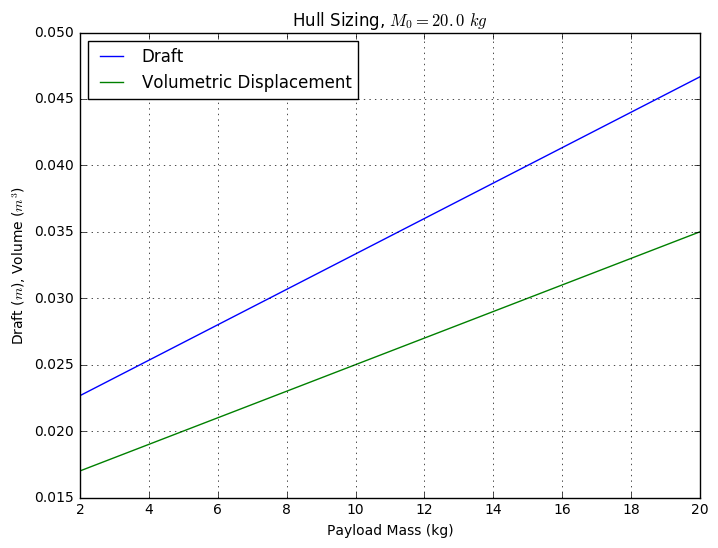

In [4]:
#### Hull Size Calculation ####
total_mass = boat_empty_mass + payload_mass
displaced_volume = total_mass / water_density

boat_area = boat_width * boat_length
draft = displaced_volume / boat_area

plt.figure(figsize=(8,6))
plt.plot(payload_mass, draft)
plt.plot(payload_mass, displaced_volume)
plt.xlabel(r'Payload Mass (kg)')
plt.ylabel(r'Draft ($m$), Volume ($m^3$)')
plt.title(r'Hull Sizing, $M_0 = ' + str(20.0) + '\ kg$')
plt.legend(['Draft', 'Volumetric Displacement'], loc=0)
plt.grid(1)
plt.savefig('hull_size.png')
plt.show()

[  9.72686507e-06   5.63420530e-05   1.69354139e-04   3.78189020e-04
   7.12272594e-04   1.20103076e-03   1.87388941e-03   2.76027446e-03
   3.88961178e-03   5.29132729e-03   6.99484688e-03   9.02959644e-03
   1.14250019e-02   1.42104891e-02   1.74154840e-02   2.10694124e-02
   2.52017004e-02   2.98417737e-02   3.50190582e-02   4.07629799e-02
   4.71029647e-02   5.40684384e-02   6.16888270e-02   6.99935563e-02
   7.90120523e-02   8.87737409e-02   9.93080478e-02   1.10644399e-01
   1.22812221e-01   1.35840938e-01   1.49759978e-01   1.64598766e-01
   1.80386727e-01   1.97153289e-01   2.14927875e-01   2.33739914e-01
   2.53618830e-01   2.74594049e-01   2.96694997e-01   3.19951101e-01
   3.44391785e-01   3.70046476e-01   3.96944601e-01   4.25115584e-01
   4.54588851e-01   4.85393829e-01   5.17559944e-01   5.51116620e-01
   5.86093285e-01   6.22519364e-01]
[  1.23016235e-05   7.12561258e-05   2.14183175e-04   4.78297878e-04
   9.00815339e-04   1.51895067e-03   2.36991896e-03   3.49093534e-0

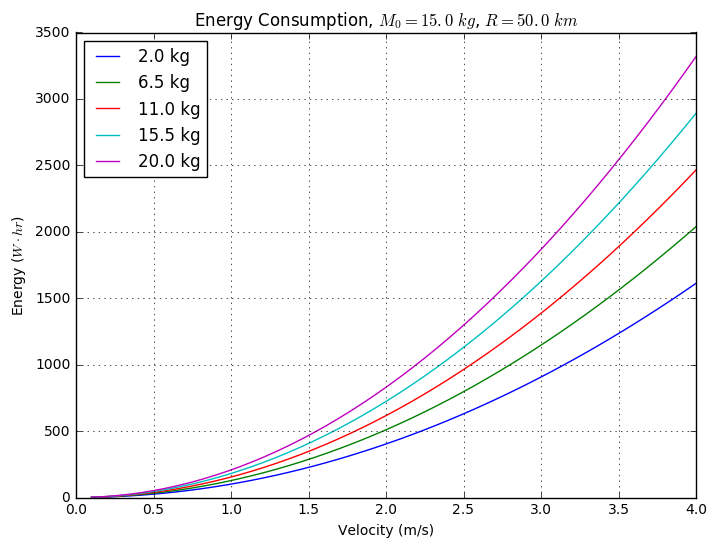

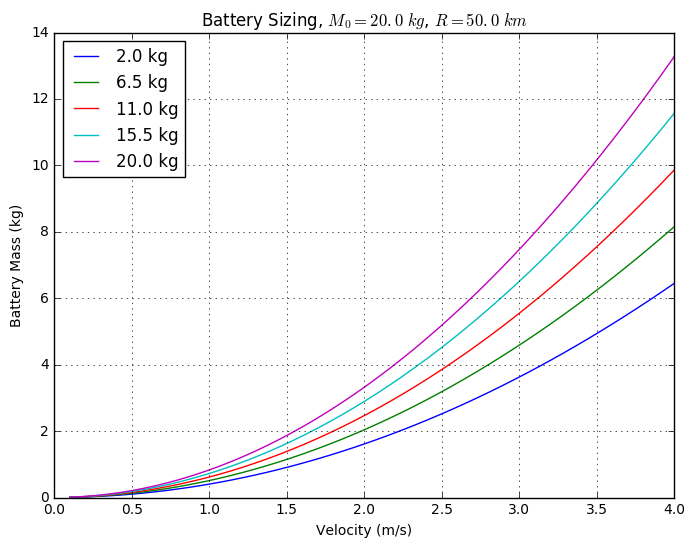

In [21]:
#### Power Consumption Calculation ####
frontal_area = draft * boat_width

plt.figure(figsize=(8,6))
for i in range(0, len(frontal_area)):
    A = frontal_area[i]
    drag_force = 0.5 * c_d * water_density * velocity**2 * A
    power = drag_force * velocity
    energy = power * (max_range / velocity) / 3600.0 # W-h
    plt.plot(velocity, energy, label=str(payload_mass[i]) + ' kg')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Energy ($W \cdot hr$)')
plt.title(r'Energy Consumption, $M_0 = ' + str(boat_empty_mass) + '\ kg$, $R = ' + str(max_range/1000.0) + '\ km$')
plt.legend(loc=0)
plt.grid(1)
plt.savefig('energy.png')
#### Battery Mass Calculation ####
frontal_area = draft * boat_width
plt.figure(figsize=(8,6))
for i in range(0, len(frontal_area)):
    A = frontal_area[i]
    drag_force = 0.5 * c_d * water_density * velocity**2 * A
    power = drag_force * velocity
    print power  * 0.00134102
    energy = power * (max_range / velocity) / 3600.0 # W-h
    battery_mass = energy / battery_energy_density
    plt.plot(velocity, battery_mass, label=str(payload_mass[i]) + ' kg')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Battery Mass (kg)')
plt.title(r'Battery Sizing, $M_0 = ' + str(20.0) + '\ kg$, $R = ' + str(max_range/1000.0) + '\ km$')

plt.legend(loc=0)
plt.grid(1)
plt.savefig('battery.png')
plt.show()